In [1]:
# Madhusmita Mukherjee 20BCE2783

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width' , 'petal lenght', 'petal width', 'target'])

In [4]:
df

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Perform Scaling on the Data

from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal lenght', 'petal width']
x = df.loc[:, features].values
y = df.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)

In [6]:
# peform pca

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4'])

In [7]:
# Combine the Target and the Principal Components

targetDataframe = df[['target']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

In [8]:
newDataframe

,PC1,PC2,PC3,PC4,target
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa
...,...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890,Iris-virginica
146,1.558492,-0.905314,-0.025382,-0.221322,Iris-virginica
147,1.520845,0.266795,0.179277,-0.118903,Iris-virginica
148,1.376391,1.016362,0.931405,-0.024146,Iris-virginica


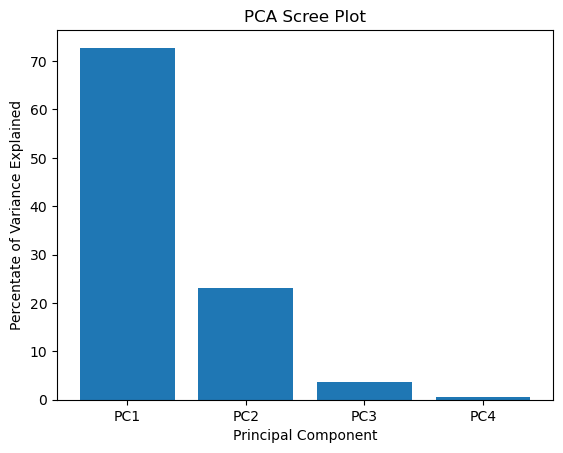

In [9]:
# Perform a Scree Plot of the Principal Components

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4']
plt.bar(x= range(1,len(percent_variance)+1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

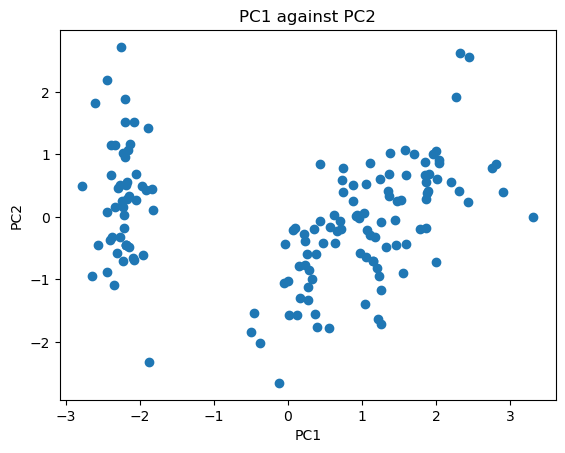

In [10]:
# Plot the Principal Components on 2D

plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

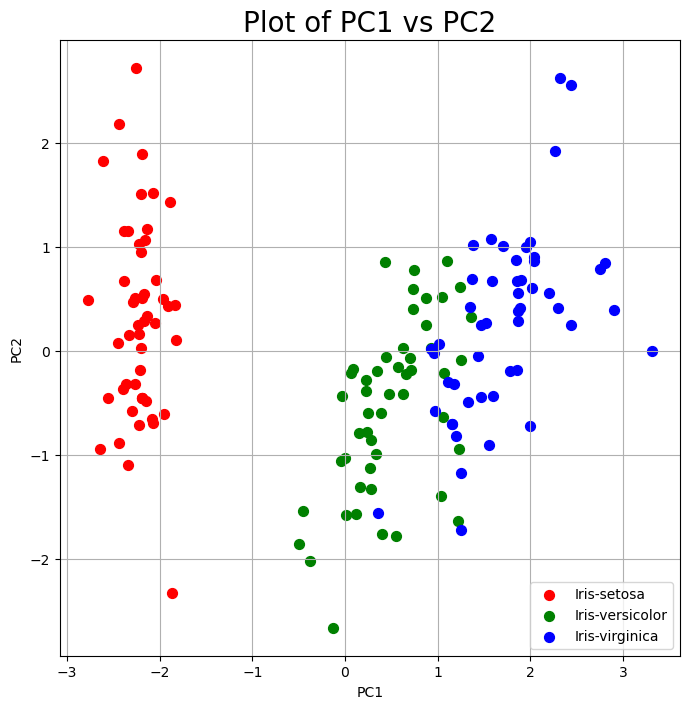

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Plot of PC1 vs PC2', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [12]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])